In [1052]:
# exploring the statistical summaries of the features, 
#visualizing the attributes, and making conclusions from 
#the visualizations and analysis


# About Data set
##### This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over 50k a year

In [1053]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [1054]:
#finding in current path
os.path.dirname(os.path.realpath('__file__'))

'/Users/lauraahumada/Desktop/Machine Learning/DataMiningNotebooks'

In [1055]:
#Opening file
df=pd.read_csv("adult.csv")

In [1056]:
#Looking at the data
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [1057]:
#description
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.00%,32561.00%,32561.00%,32561.00%,32561.00%,32561.00%
mean,38.58%,189778.37%,10.08%,1077.65%,87.30%,40.44%
std,13.64%,105549.98%,2.57%,7385.29%,402.96%,12.35%
min,17.00%,12285.00%,1.00%,0.00%,0.00%,1.00%
25%,28.00%,117827.00%,9.00%,0.00%,0.00%,40.00%
50%,37.00%,178356.00%,10.00%,0.00%,0.00%,40.00%
75%,48.00%,237051.00%,12.00%,0.00%,0.00%,45.00%
max,90.00%,1484705.00%,16.00%,99999.00%,4356.00%,99.00%


+ Checking Capital as we can see median is 0 and mean is 1077 showing just outliers

In [1058]:
# Capital gain seems to have all 0 and one hug outlier 99999
df["net_capital"]=df["capital.gain"]-df["capital.loss"]
# These ouliers are have all positive net_capital and ther rest of the data net equals 0
df[df["net_capital"]>0].describe()
#however no patter is seen among these outliers
df["net_capital"].describe()
#however no patter is seen among these outliers
#we will transform into net_capital category with negative, zero and positive
#therefore we will also remove capital.loss and capital.gain

count   32561.00%
mean      990.35%
std      7408.99%
min     -4356.00%
25%         0.00%
50%         0.00%
75%         0.00%
max     99999.00%
Name: net_capital, dtype: float64

 ###  New variables

+ Classifying age set as "age_class"  \
    containing "Young"(0,25), "Middle-aged(26,45)", "Senior"(46-65), "Old"(66+)
+ Classifying hours worked set as "work_type" \
    containing "PartTime"(0,25), "Full_time"(25,40), "OverTime"(41-60), "Workaholic"(60+)
+ Classifying net_capital as categorical \
    containing "Negative","Zero" and "Positive"


In [1059]:
# New variables this will also help us with graphs
df["age_class"] =pd.cut(df["age"], bins=[15, 25, 45, 65, 100],labels = ["Young", "Middle-aged", "Senior", "Old"])
df["work_type"] =pd.cut(df["hours.per.week"], bins=[0,25,40,60,168],labels = ["PartTime", "Full_time", "OverTime", "Workaholic"])


conditions = [
    (df['net_capital'] <0),
    (df['net_capital'] == 0),
    (df['net_capital'] > 0)
    ]

values = ['Negative', 'Zero', 'Positive']

df['net_capital_cat'] = np.select(conditions, values)


+ We can also see how Education number is misleading and has to many categories 
+ Creating a new variable "edu_cat" with : \
    'SomeHS', 'HighschoolGrad', 'SomeCollege', 'CollegeGrad','Doctorate'

+ example 9 years is  Highschool Grad, so we will assume the categories ("education") are correct and number ("education.num")is incorrect


In [1060]:
conditions = [
    (df['education.num'] <9),
    (df['education.num'] == 9),
    (df['education.num'] >= 10) & (df['education.num'] <= 12) ,
    (df['education.num'] == 13),
    (df['education.num'] == 14),
    (df['education.num'] <= 16) & (df['education.num'] >= 15)
    ]

values = ['SomeHS', 'HighschoolGrad', 'SomeCollege', 'Bachelors','Masters',"Prof/Doctorate"]

df['edu_cat'] = np.select(conditions, values)

# making sure the new attributes are objectes to match the rest
# later we will modify to category
for i in df.select_dtypes(include=['category']).columns:
    df[i]= df[i].astype("object")
    

graph x= sex and percentage hue=income

In [1061]:
#checking if it did the new variable correctly
df[["education.num","education","edu_cat"]].head()

,education.num,education,edu_cat
0,9,HS-grad,HighschoolGrad
1,9,HS-grad,HighschoolGrad
2,10,Some-college,SomeCollege
3,4,7th-8th,SomeHS
4,10,Some-college,SomeCollege


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Preschool'),
  Text(1, 0, '1st-4th'),
  Text(2, 0, '5th-6th'),
  Text(3, 0, '7th-8th'),
  Text(4, 0, '9th'),
  Text(5, 0, '10th'),
  Text(6, 0, '11th'),
  Text(7, 0, '12th'),
  Text(8, 0, 'HS-grad '),
  Text(9, 0, 'Some-college'),
  Text(10, 0, 'Bachelors'),
  Text(11, 0, 'Masters'),
  Text(12, 0, 'Doctorate'),
  Text(13, 0, 'Prof-school'),
  Text(14, 0, 'Assoc-acdm'),
  Text(15, 0, 'Assoc-voc')])

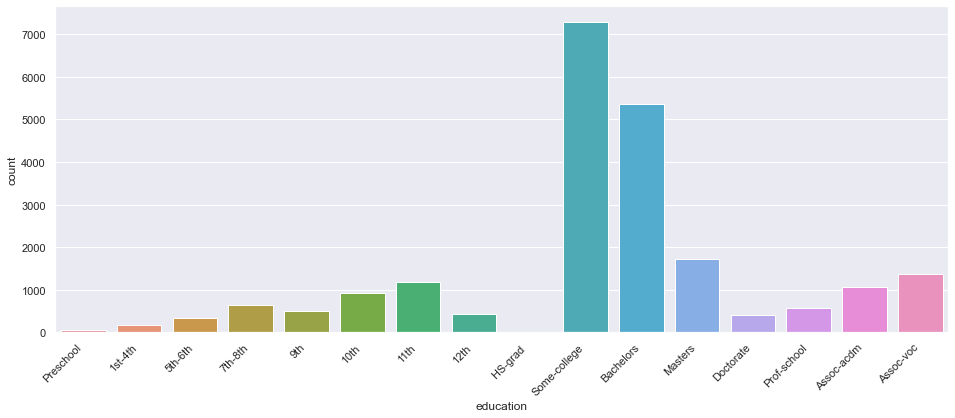

In [1062]:
plt.figure(figsize=(16,6))
educ_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
                'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school', 
              'Assoc-acdm', 'Assoc-voc']
sns.countplot(x="education", order=educ_order, data=df)
plt.xticks(rotation = 45, ha='right')


In [1063]:
# now we can remove eduaction and educaiton.num having the new "edu_cat"
df=df.drop(columns=["education","education.num"])
#drop variables now that information is saved in net_capital
df=df.drop(columns=["capital.loss","capital.gain"])
# we can see that FNLWGT is skewed and there is state specific among other variables so we will drop it, not useful
# we can also drop hours per weed due to our new variable
df=df.drop(columns=["fnlwgt"])

In [1064]:
df.columns

Index(['age', 'workclass', 'marital.status', 'occupation', 'relationship',
       'race', 'sex', 'hours.per.week', 'native.country', 'income',
       'net_capital', 'age_class', 'work_type', 'net_capital_cat', 'edu_cat'],
      dtype='object')

In [1065]:
# Lets look at all the unique categorical variables
for i in df.select_dtypes(object).columns:
    print(i)
    print(df[i].unique())
    print("")

workclass
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

marital.status
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

occupation
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

relationship
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']

race
['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']

sex
['Female' 'Male']

native.country
['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Canada' 'South' 'Holand-Netherlands'
 'Puerto-Rico' 'Poland' 'Iran' 'England' 'Germany' 'Italy' 'Japan' 'Hong'
 'Honduras' 'Cuba' 'Ireland' 'Cambodia' 'Peru' 'Nicaragua'
 'Dom

In [1066]:
# missing values
df.isnull().sum()

age                0
workclass          0
marital.status     0
occupation         0
relationship       0
race               0
sex                0
hours.per.week     0
native.country     0
income             0
net_capital        0
age_class          0
work_type          0
net_capital_cat    0
edu_cat            0
dtype: int64

### It seems like there are no missing values per code however we did see question marks in the categorical variables whe checking unique variables so we will address those

In [1067]:
# counting how many missing/incorrect values.
# we know they have less than 2 characters ? and empty
# creating list for incorrect values
counter=[]

vals=[]
for i in df.select_dtypes(object).columns:
    vals.append(str(((df[df[i].str.len()<2])[i]).unique()))
    counter.append((df[df[i].str.len()<2].count())[i])
# creating df and filtering    
d = {'Column': df.select_dtypes(object).columns, 'MissingValues': counter}
missing=pd.DataFrame(data=d)
print(set(vals))
missing[missing["MissingValues"]!=0]


{'[]', "['?']"}


,Column,MissingValues
0,workclass,1836
2,occupation,1843
6,native.country,583


Dropping incorrect values

In [1068]:
# removing incorrect values in occupation gets rid of all incorrect values in work class as we can't impute those
# we will leave native.country empty to see if we just want to drop that column or rows depending on EDA
df.drop(df.loc[df['occupation'] == '?'].index, inplace=True)

In [1069]:
# verify that there are no incorrect values in workclass and occupation
for i in ["workclass", "occupation","native.country"]:
        print(i.upper())
        print(df[df[i].str.len()<2].count()[i])
        print()

WORKCLASS
0

OCCUPATION
0

NATIVE.COUNTRY
556



In [1070]:
# Let's see the data types. we need to change obj to category
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              30718 non-null  int64 
 1   workclass        30718 non-null  object
 2   marital.status   30718 non-null  object
 3   occupation       30718 non-null  object
 4   relationship     30718 non-null  object
 5   race             30718 non-null  object
 6   sex              30718 non-null  object
 7   hours.per.week   30718 non-null  int64 
 8   native.country   30718 non-null  object
 9   income           30718 non-null  object
 10  net_capital      30718 non-null  int64 
 11  age_class        30718 non-null  object
 12  work_type        30718 non-null  object
 13  net_capital_cat  30718 non-null  object
 14  edu_cat          30718 non-null  object
dtypes: int64(3), object(12)
memory usage: 3.7+ MB


In [1071]:
# Categorical variables
cat_df=df.select_dtypes(include=['object'])
#num_cols = df[df.dtypes[i]=="object"]

# Continuous variable
num_df = df._get_numeric_data()

# All columns
All_Col=df.columns

# Looking at categorical data

In [1072]:
print(cat_df.columns)

Index(['workclass', 'marital.status', 'occupation', 'relationship', 'race',
       'sex', 'native.country', 'income', 'age_class', 'work_type',
       'net_capital_cat', 'edu_cat'],
      dtype='object')


+ Looking at distribution
+ Most people work in private companies
+ Most are married-civ-spouse followed by never married
+ Large majority are white
+ There are 6 times more husbands than wife and Husbands is the largest group
+ This can be explained by having females total being half of the total of males
+ The majority people are from US
+ most people obtain less than 50K, greater than 50K is more than half of those with <50K
+ most people are middle aged
+ most are are full time
+ net capital for most is zero
+ more than half have at least graduated highschoool or higher education

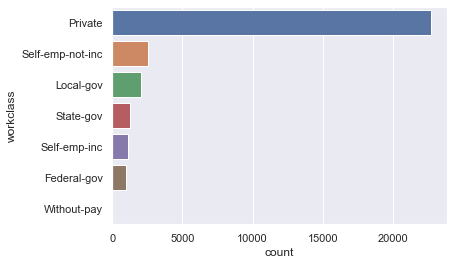

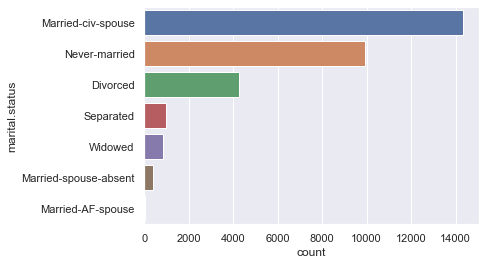

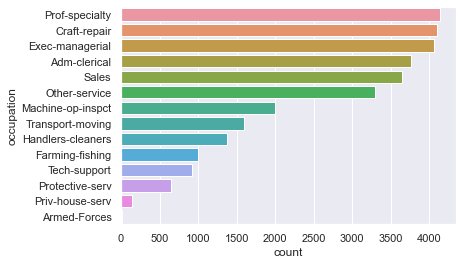

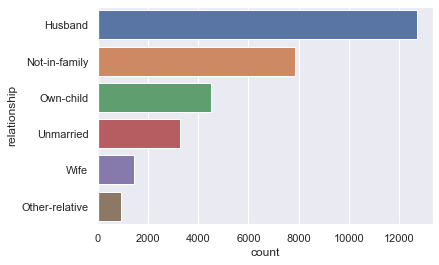

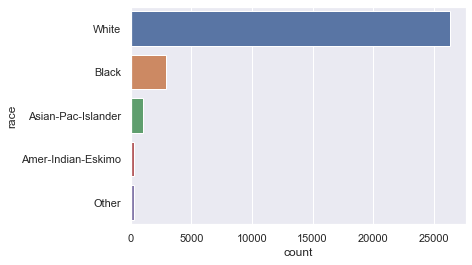

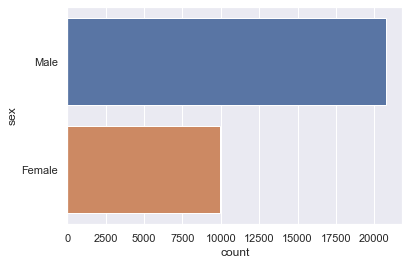

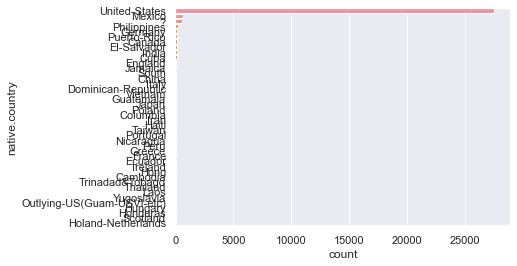

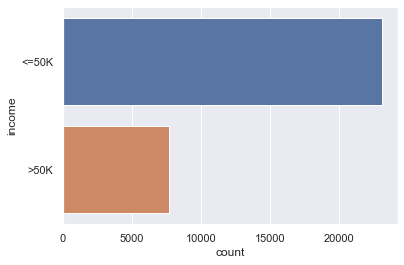

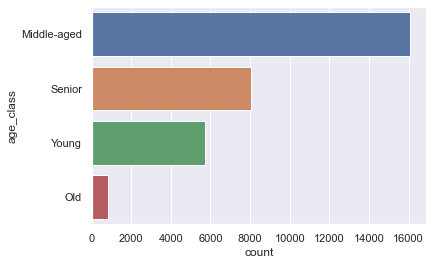

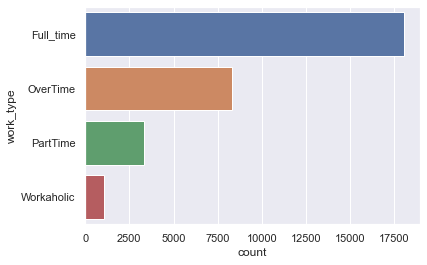

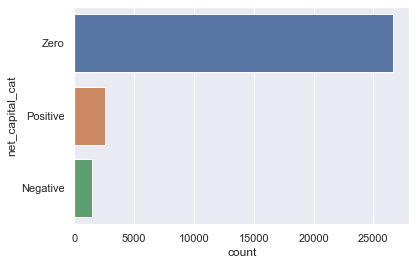

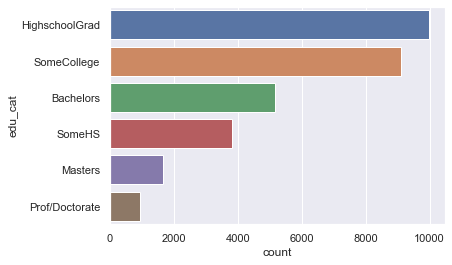

<Figure size 432x288 with 0 Axes>

In [1073]:
for i in cat_df.columns:
    sns.countplot( y= i, data = df, orient= 'h',
    order=df[i].value_counts().index)
    plt.figure()


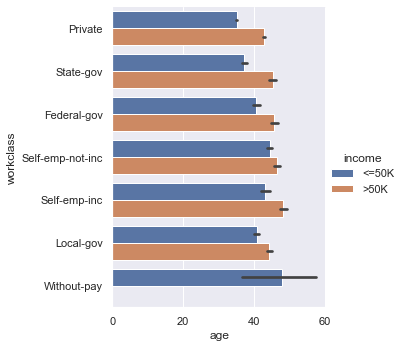

In [1074]:
sns.catplot(x="age", y="workclass", hue="income", kind="bar", data=df)

### ***We see that there is a large gap between male and female data therefore we will look at the distribution filtering for each to see if anything is different***

##### Income as the target
+ Marital.status does seem to have a difference on Female and male having >50k.
+ For both male and female Married-AF-Spouse and Married-civ-spouse have the very similar percent for obtaining more or less than 50k
+ Whowever in the rest you see large differences

In [1075]:
a=pd.crosstab([df["marital.status"],df["sex"]],df["income"],
           normalize='index')

sorted_df = pd.DataFrame(a.sort_values(by = ['>50K'], ascending = [False]))
sorted_df

income                        <=50K  >50K
marital.status        sex                
Married-AF-spouse     Female  0.50% 0.50%
Married-civ-spouse    Female  0.53% 0.47%
                      Male    0.55% 0.45%
Married-AF-spouse     Male    0.56% 0.44%
Widowed               Male    0.73% 0.27%
Divorced              Male    0.83% 0.17%
Separated             Male    0.87% 0.13%
Married-spouse-absent Male    0.89% 0.11%
Divorced              Female  0.93% 0.07%
Widowed               Female  0.94% 0.06%
Never-married         Male    0.94% 0.06%
Married-spouse-absent Female  0.94% 0.06%
Never-married         Female  0.96% 0.04%
Separated             Female  0.97% 0.03%


### Just male distribution of all variables and just female distribution of all variables to see diferences

#### Similar
+ For working 78% females works on private companies while 71% of man work on private
+ ***For excecutivte managerial 11% for female while 13% for men.***
+ Sales is another occupation that is similar 11% male while 12% female
+ From all females 89% are from US and from all males 89% are males
+ Out of females 54% are middle age  and for males the same
+ For highschoool grad in their category they make up about the same 32% vs 31%
+ males and females do have about the same % of bacherlos 17% male and 15% woman
+ out of females 5% have Masters and its the same for males
+ ***Education seems similar when taking into account the discrepancy of male and female distribution in the data***
 
#### Big differences
+ 61% males are married with spouce while only 15% females are married
+ More women have never been married 44% vs only 26% of man have never been married
+ Only 8% men are divorsed while 25% women are divorsed
+ 20% of females own child while male own only 12% child even though they have higher% of marriage
+ 88% of males are white and 80% of women are white
+ Out of males 31% make >50k while for out of females only 11% make >55k 
+ out of females 65% are fulltime compare to out of male 55% are full time, however out of males 32% do over time while out of women they only do 15%


***Only Marital.status, relationship and education results are different when filtering by gender***

In [1076]:
for i in cat_df.columns:
    print(i.upper())
    print("--------MALE--------")
    print(df[df["sex"]=="Male"][i].value_counts(normalize=True) * 100)
    print("--------FEMALE--------")
    print(df[df["sex"]=="Female"][i].value_counts(normalize=True) * 100)
    print()

WORKCLASS
--------MALE--------
Private            71.89%
Self-emp-not-inc   10.30%
Local-gov           6.05%
Self-emp-inc        4.72%
State-gov           3.89%
Federal-gov         3.10%
Without-pay         0.04%
Name: workclass, dtype: float64
--------FEMALE--------
Private            78.07%
Local-gov           8.41%
State-gov           4.92%
Self-emp-not-inc    4.02%
Federal-gov         3.17%
Self-emp-inc        1.36%
Without-pay         0.05%
Name: workclass, dtype: float64

MARITAL.STATUS
--------MALE--------
Married-civ-spouse      61.70%
Never-married           26.61%
Divorced                 8.21%
Separated                1.79%
Married-spouse-absent    0.95%
Widowed                  0.70%
Married-AF-spouse        0.04%
Name: marital.status, dtype: float64
--------FEMALE--------
Never-married           44.11%
Divorced                25.70%
Married-civ-spouse      15.23%
Widowed                  7.00%
Separated                5.91%
Married-spouse-absent    1.93%
Married-AF-spouse 

In [1077]:
# A quick glance at the hours per week of work between male and female
#there are a lot more males in the data so graphs show than females work less but lets look at actual numbers
for i in ["Male", "Female"]:
    print("--Hours a week--")
    print("Mean for",i, df[df["sex"]==i]["hours.per.week"].mean())
    print("Median for",i, df[df["sex"]==i]["hours.per.week"].median())
    print("")


--Hours a week--
Mean for Male 42.857177217625555
Median for Male 40.0

--Hours a week--
Mean for Female 36.95528700906345
Median for Female 40.0



In [1078]:
df=df.drop(columns=["native.country"])

# Looking at continuous  data

+ No patterns observed within the continuous data

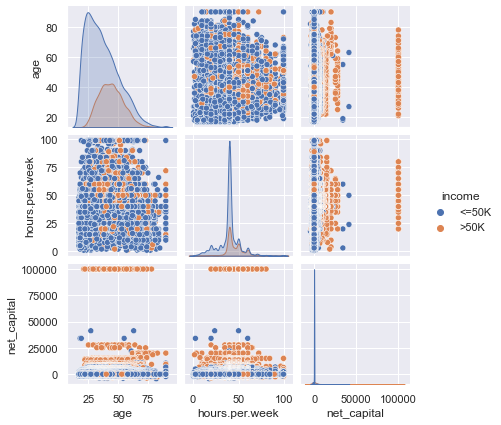

In [1079]:
sns.pairplot(df, hue="income", height=2)

##### Distribution
+ Age is a little right skewed 
+ Hours per week seem somewhat normally distributed
+ Net capital it is very right skewed most point around0

age


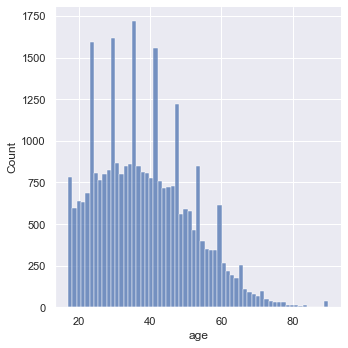

hours.per.week


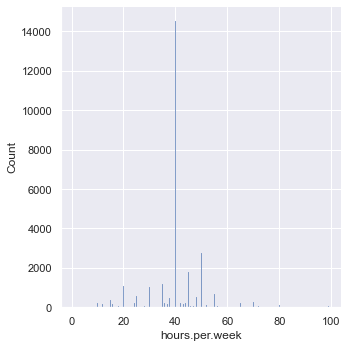

net_capital


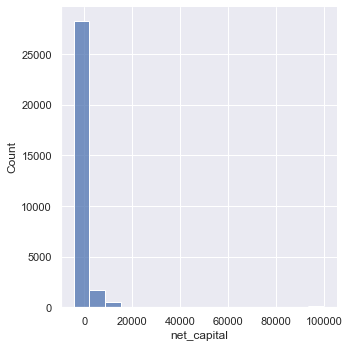

In [1080]:
for i in list(num_df):
    print(i)
    sns.displot(df[i], kde=False)
    plt.show()

age


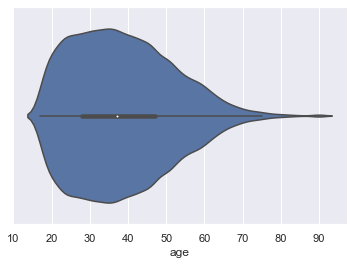

hours.per.week


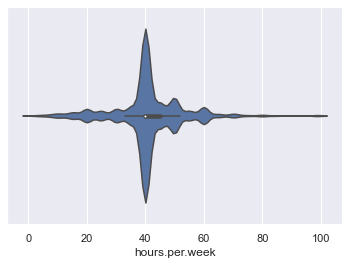

net_capital


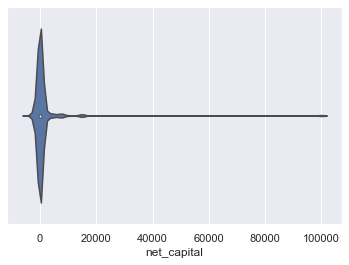

In [1081]:
for i in list(num_df):
    print(i)
    sns.violinplot(x=i,y=None, data=df)
    #sns.displot(df[i], kde=False)
    plt.show()

In [1082]:
# Same info as above
# for i in list(num_df):
#     print(i)
#     plt.boxplot(df[i])
#     plt.show()

+ let's log for the variable due to the skewnness

In [1083]:
# log numeric variables
from sklearn.preprocessing import FunctionTransformer 
log_transformer = FunctionTransformer(np.log1p)
for i in num_df.columns:
    df[i] = log_transformer.fit_transform(df[[i]])

age


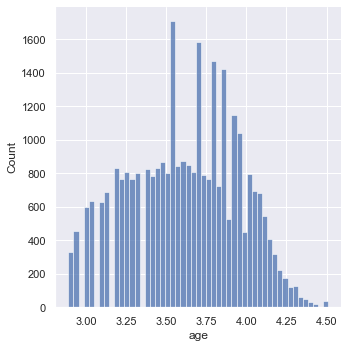

hours.per.week


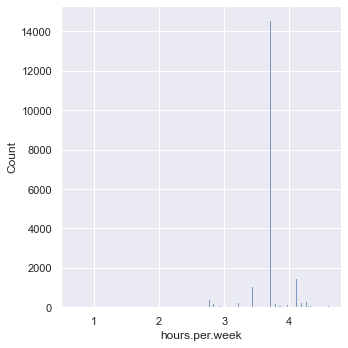

net_capital


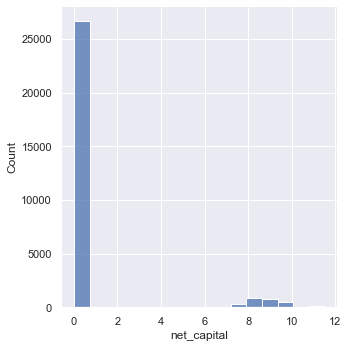

In [1084]:
# let's verify the distribution
for i in df._get_numeric_data().columns:
    print(i)
    sns.displot(df[i], kde=False)
    plt.show()

<AxesSubplot:xlabel='sex', ylabel='age'>

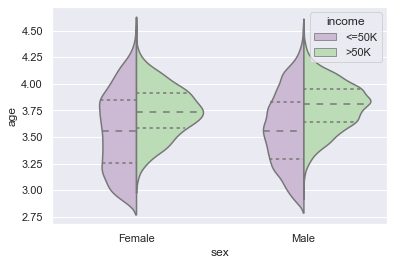

In [1085]:
sns.violinplot(x="sex", y="age", hue="income", data=df, 
               split=True, inner="quart",palette='PRGn',
               height=7)

<AxesSubplot:xlabel='age_class', ylabel='hours.per.week'>

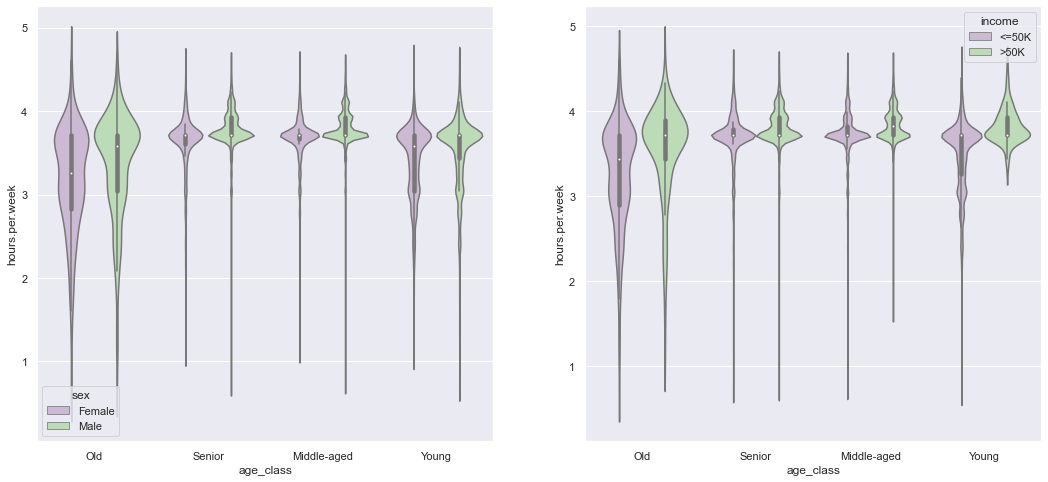

In [1086]:
sns.set()
fig, axes = plt.subplots(1, 2,figsize=(18, 8))

sns.violinplot(ax=axes[0], data=df,x='age_class',y='hours.per.week',hue='sex', 
               kind='violin',ci=95,palette='PRGn',
               height=7)

sns.violinplot(ax=axes[1],x='age_class',y='hours.per.week',hue='income',data=df, 
               kind='violin',ci=95,palette='PRGn',
               height=7)

<AxesSubplot:xlabel='relationship', ylabel='hours.per.week'>

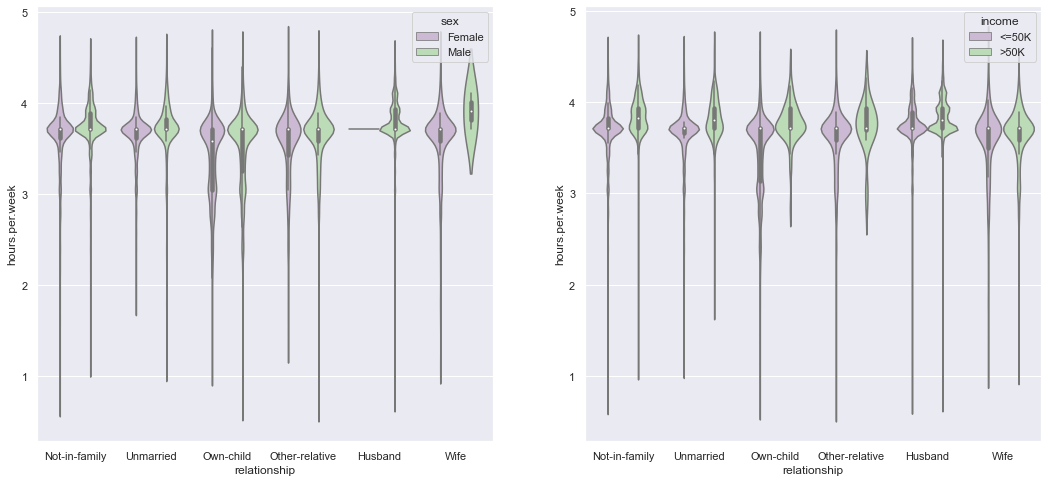

In [1087]:

sns.set()
fig, axes = plt.subplots(1, 2,figsize=(18, 8))

sns.violinplot(ax=axes[0], data=df,x='relationship',y='hours.per.week',hue='sex', 
               kind='violin',ci=95,palette='PRGn',
               height=7)

sns.violinplot(ax=axes[1],x='relationship',y='hours.per.week',hue='income',data=df, 
               kind='violin',ci=95,palette='PRGn',
               height=7)



In [1088]:
#### Verifying data type and updating to their correct dtype

# Making objects categorical varibles
for i in df.select_dtypes(include=['object']).columns:
    df[i]= df[i].astype("category")

from scipy import stats
from scipy.stats import zscore
#Let's standarize values first
for i in num_df.columns:
    df[i] = df[[i]].apply(zscore)

In [1089]:
# no strong relationships

<AxesSubplot:>

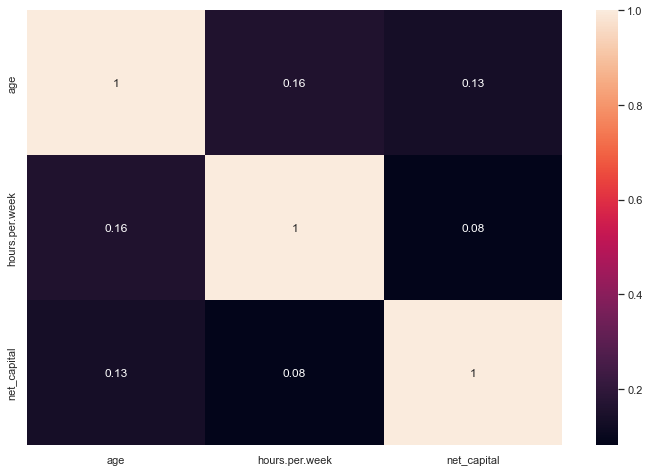

In [1090]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='marital.status,income'>

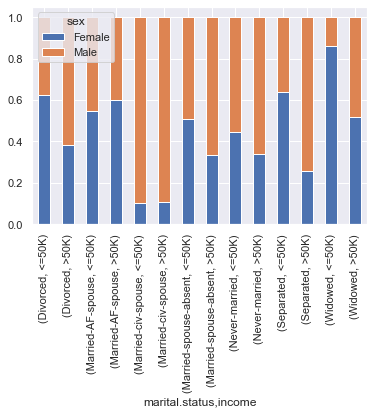

In [1091]:

# print survival_rate
income_cross.plot(kind='bar', 
                   stacked=True)


In [1092]:
df.skew() 

/Users/lauraahumada/opt/anaconda3/envs/smuenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age              -0.14%
hours.per.week   -2.18%
net_capital       2.97%
dtype: float64